<a href="https://colab.research.google.com/github/leandroleao2k/PyLeao/blob/main/CoLab_Python_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística


**negrito**# Ex1 Logistic Regression trabalha a predição de variáveis com bi valores. 

In [ ]:
# 1 Import libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt



In [ ]:
#2 Carregar dados
temperatura =  [[30], [12], [14], [18], [25], [5], [15], [27], [28], [12], [14], [18], [25], [5], [15], [27]]
jaqueta = [False, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False]

lr = LogisticRegression()
lr.fit(temperatura,jaqueta)
deveVestirJaqueta = [ [25], [4], [12], [35]]
lr.predict(deveVestirJaqueta)

array([False,  True,  True, False])

In [ ]:
#3 prepare the model 
#define the predictor variables and the response variable
X = temperatura
y = jaqueta

#4 split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 
print(X_train)
print(y_train)

#5 Fit the logist regression model
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

print(y_pred)


[[12], [27], [18], [30], [5], [25]]
[True, False, True, False, True, False]
[ True  True]


In [ ]:
#6 Model diagnostics
# create a confusion matrix to test model

print("y_test:", y_test, " y_pred:", y_pred )
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


y_test: [True, True]  y_pred: [ True  True]
[[2]]
Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
No handles with labels found to put in legend.


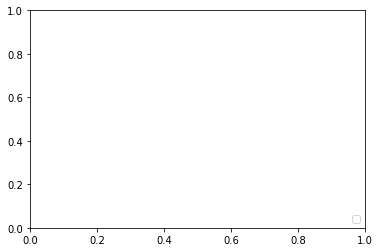

In [ ]:
#The higher the AUC (area under the curve), the more accurately our model is able to predict outcomes:
#define metrics
from sklearn.metrics import roc_auc_score

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

try:
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC="+str(auc))
except ValueError:
    pass

#create ROC curve
plt.legend(loc=4)
plt.show()

# Exemplo SciKit Learn

Computing regularization path ...
This took 0.280s


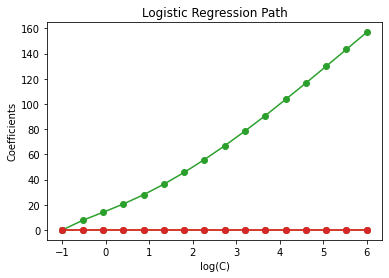

In [ ]:

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X /= X.max()  # Normalize X to speed-up convergence

# #############################################################################
# Demo path functions

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

# CoLab

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>O que é o Colaboratory?</h1>

O Colaboratory ou "Colab" permite escrever código Python no seu navegador, com: 
- Nenhuma configuração necessária
- Acesso gratuito a GPUs
- Compartilhamento fácil

Você pode ser um <strong>estudante</strong>, um <strong>cientista de dados</strong> ou um <strong>pesquisador de IA</strong>, o Colab pode facilitar seu trabalho. Assista ao vídeo <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a usá-lo abaixo!

## <strong>Primeiros passos</strong>

O documento que você está lendo não é uma página da Web estática, mas sim um ambiente interativo chamado <strong>notebook Colab</strong> que permite escrever e executar código.

Por exemplo, aqui está uma <strong>célula de código</strong> com um breve script Python que calcula um valor, armazena-o em uma variável e imprime o resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Para executar o código na célula acima, clique nela e depois pressione o botão Play à esquerda do código ou use o atalho do teclado "Command/Ctrl+Enter". Para editar o código, basta clicar na célula e começar a editar.

As variáveis definidas em uma célula podem ser usadas mais tarde em outras células:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Os notebooks do Colab permitem combinar <strong>código executável</strong> e <strong>rich text</strong> em um só documento, além de <strong>imagens</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> e muito mais. Quando você cria seus próprios notebooks do Colab, eles são armazenados na sua conta do Google Drive. É possível compartilhar os notebooks do Colab facilmente com colegas de trabalho ou amigos e permitir que eles façam comentários ou até editem o documento. Para saber mais, consulte a <a href="/notebooks/basic_features_overview.ipynb">Visão Geral do Colab</a>. Para criar um novo notebook do Colab, use o menu Arquivo acima ou acesse o seguinte: <a href="http://colab.research.google.com#create=true">criar um novo notebook do Colab</a>.

Os notebooks do Colab são notebooks do Jupyter hospedados no Colab. Para saber mais sobre o projeto Jupyter, acesse <a href="https://www.jupyter.org">jupyter.org</a>.

## Ciência de dados

Com o Colab, você pode aproveitar todo o potencial das conhecidas bibliotecas Python para analisar e ver dados. A célula de códigos abaixo usa <strong>numpy</strong> para gerar dados aleatórios e <strong>matplotlib</strong> para visualizá-los. Para editar o código, basta clicar na célula e começar a editar.

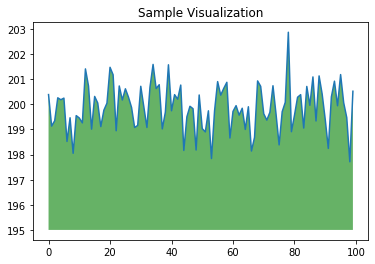

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

É possível importar para os notebooks do Colab os dados da sua conta do Google Drive, como planilhas. Também é possível importar do GitHub e de muitas outras fontes. Para saber mais sobre como importar dados e como o Colab pode ser usado para a ciência de dados, consulte o link abaixo em <a href="#working-with-data">Como trabalhar com dados</a>.

## Machine learning

Com o Colab, é possível importar um conjunto de dados de imagem, treinar um classificador de imagens dentro dele e avaliar o modelo, tudo com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os notebooks do Colab executam código dos servidores em nuvem do Google. Isso significa que você pode tirar proveito da potência de hardware do Google, como <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Você só precisa de um navegador.

O Colab é usado amplamente pela comunidade de machine learning, para aplicações como:
- Primeiros passos com o TensorFlow
- Desenvolvimento e treinamento de redes neurais
- Experimentos com TPUs
- Divulgação de pesquisas em IA
- Criação de tutoriais

Para ver notebooks do Colab que demonstram aplicações de machine learning, consulte os <a href="#machine-learning-examples">exemplos de machine learning</a> abaixo.

## Mais recursos

### Como trabalhar com Notebooks no Colab
- [Visão geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Salvar e carregar notebooks no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 no Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Como trabalhar com dados
- [Carregar dados: Drive, Planilhas e Google Cloud Storage](/notebooks/io.ipynb) 
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Primeiros passos com o BigQuery](/notebooks/bigquery.ipynb)

### Curso intensivo de machine learning
Estes são alguns notebooks do curso on-line do Google sobre machine learning. Acesse o <a href="https://developers.google.com/machine-learning/crash-course/">site do curso completo</a> para saber mais.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras e uso de dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Exemplos de machine learning

Para ver exemplos completos das análises interativas de machine learning possibilitadas pelo Colaboratory, confira estes tutoriais que usam modelos do <a href="https://tfhub.dev">TensorFlow Hub</a>.

Vejas alguns exemplos:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Treinar novamente um classificador de imagens</a>: crie um modelo do Keras com base em um classificador de imagens pré-treinado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique avaliações de filmes do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: use o aprendizado profundo para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: use um modelo de machine learning para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolação de vídeo</a>: preveja o que aconteceu em um vídeo entre o primeiro e o último frames.
